In [424]:
#importing libraries
import pandas as pd
pd.options.display.float_format = '{:.3f}'.format
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing as pp
from scipy.stats import zscore

In [425]:
#reading csv file
var = pd.read_csv('uncleandata.csv')

In [426]:
#finding mean,count,5 point summary etc
var.describe()

,trt,age,educ,black,hisp,marr,nodeg,re74,re75,re78
count,100.000,97.000,96.000,99.000,100.000,98.000,100.000,100.000,100.000,100.000
mean,0.000,41.536,11.990,0.051,0.070,0.694,0.380,16353.373,15477.017,15989.844
std,0.000,52.842,2.654,0.220,0.256,0.463,0.488,8891.905,8914.678,8834.883
min,0.000,-17.000,4.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,25.000,10.000,0.000,0.000,0.000,0.000,9414.277,8153.577,8977.189
50%,0.000,33.000,12.000,0.000,0.000,1.000,0.000,18678.670,16559.590,17771.140
75%,0.000,45.000,13.000,0.000,0.000,1.000,1.000,24999.268,25008.570,25564.670
max,0.000,465.000,18.000,1.000,1.000,1.000,1.000,25862.320,25243.550,25564.670


In [427]:
#printing missing values for each attribute
print(var.isnull().sum())

trt      0
age      3
educ     4
black    1
hisp     0
marr     2
nodeg    0
re74     0
re75     0
re78     0
dtype: int64


In [428]:
#age is a numerical value which has 3 null values
age = var['age']
print(age.isnull().sum())

3


In [429]:
#handling numerical missing values replacing by mean
var['age']=var['age'].fillna(var['age'].mean())
print(var.isnull().sum())

trt      0
age      0
educ     4
black    1
hisp     0
marr     2
nodeg    0
re74     0
re75     0
re78     0
dtype: int64


In [430]:
#as we can observe below age mean has remained consant
var.describe()

,trt,age,educ,black,hisp,marr,nodeg,re74,re75,re78
count,100.000,100.000,96.000,99.000,100.000,98.000,100.000,100.000,100.000,100.000
mean,0.000,41.536,11.990,0.051,0.070,0.694,0.380,16353.373,15477.017,15989.844
std,0.000,52.036,2.654,0.220,0.256,0.463,0.488,8891.905,8914.678,8834.883
min,0.000,-17.000,4.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,25.000,10.000,0.000,0.000,0.000,0.000,9414.277,8153.577,8977.189
50%,0.000,33.000,12.000,0.000,0.000,1.000,0.000,18678.670,16559.590,17771.140
75%,0.000,45.000,13.000,0.000,0.000,1.000,1.000,24999.268,25008.570,25564.670
max,0.000,465.000,18.000,1.000,1.000,1.000,1.000,25862.320,25243.550,25564.670


In [431]:
#Educ is a categorical value which has 4 null values
educ = var['educ']
print(educ.isnull().sum())

4


In [432]:
#Here we observe the categorical data education
var['educ'].value_counts()

12.000    28
10.000    15
13.000    10
16.000     9
11.000     7
9.000      6
14.000     6
8.000      5
18.000     3
15.000     2
17.000     2
7.000      2
4.000      1
Name: educ, dtype: int64

In [433]:
#handling categorical missing values by filling the highest frequent value
var['educ']=var['educ'].fillna(var['educ'].value_counts().index[0])
print(var.isnull().sum())

trt      0
age      0
educ     0
black    1
hisp     0
marr     2
nodeg    0
re74     0
re75     0
re78     0
dtype: int64


In [434]:
#as we observe below mean of education also doesnot change with much difference
var.describe()

,trt,age,educ,black,hisp,marr,nodeg,re74,re75,re78
count,100.000,100.000,100.000,99.000,100.000,98.000,100.000,100.000,100.000,100.000
mean,0.000,41.536,11.990,0.051,0.070,0.694,0.380,16353.373,15477.017,15989.844
std,0.000,52.036,2.600,0.220,0.256,0.463,0.488,8891.905,8914.678,8834.883
min,0.000,-17.000,4.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,25.000,10.000,0.000,0.000,0.000,0.000,9414.277,8153.577,8977.189
50%,0.000,33.000,12.000,0.000,0.000,1.000,0.000,18678.670,16559.590,17771.140
75%,0.000,45.000,13.000,0.000,0.000,1.000,1.000,24999.268,25008.570,25564.670
max,0.000,465.000,18.000,1.000,1.000,1.000,1.000,25862.320,25243.550,25564.670


In [435]:
#printing missing values
print(var.isnull().sum())

trt      0
age      0
educ     0
black    1
hisp     0
marr     2
nodeg    0
re74     0
re75     0
re78     0
dtype: int64


In [436]:
#handling missing values by removing the null objects
var=var.dropna(subset=["marr"])

In [437]:
#handling missing values by removing the null objects
var=var.dropna(subset=["black"])

In [438]:
#printing missing values
print(var.isnull().sum())

trt      0
age      0
educ     0
black    0
hisp     0
marr     0
nodeg    0
re74     0
re75     0
re78     0
dtype: int64


In [439]:
#by using this method the 5 point summary value is more deviated than last 2 method
#Hence this method is not efficient
var.describe()

,trt,age,educ,black,hisp,marr,nodeg,re74,re75,re78
count,97.000,97.000,97.000,97.000,97.000,97.000,97.000,97.000,97.000,97.000
mean,0.000,41.532,12.021,0.052,0.072,0.691,0.371,16224.769,15681.861,16114.974
std,0.000,52.813,2.549,0.222,0.260,0.465,0.486,8971.914,8737.012,8747.525
min,0.000,-17.000,4.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,25.000,10.000,0.000,0.000,0.000,0.000,8638.407,9755.468,9043.687
50%,0.000,33.000,12.000,0.000,0.000,1.000,0.000,18534.660,16735.940,18059.300
75%,0.000,45.000,13.000,0.000,0.000,1.000,1.000,24994.370,24967.840,25564.670
max,0.000,465.000,18.000,1.000,1.000,1.000,1.000,25862.320,25243.550,25564.670


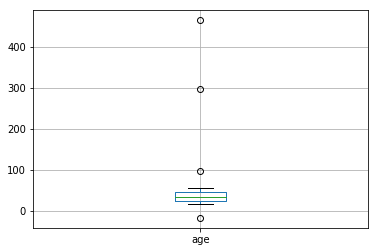

In [440]:
#here we observe that we have few outliers in age
var.boxplot("age")

In [441]:
#removing outliers by replacing with mean of valid range
#copy dataframe to perform operation
datamean=var.copy()
datamean.describe()

,trt,age,educ,black,hisp,marr,nodeg,re74,re75,re78
count,97.000,97.000,97.000,97.000,97.000,97.000,97.000,97.000,97.000,97.000
mean,0.000,41.532,12.021,0.052,0.072,0.691,0.371,16224.769,15681.861,16114.974
std,0.000,52.813,2.549,0.222,0.260,0.465,0.486,8971.914,8737.012,8747.525
min,0.000,-17.000,4.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,25.000,10.000,0.000,0.000,0.000,0.000,8638.407,9755.468,9043.687
50%,0.000,33.000,12.000,0.000,0.000,1.000,0.000,18534.660,16735.940,18059.300
75%,0.000,45.000,13.000,0.000,0.000,1.000,1.000,24994.370,24967.840,25564.670
max,0.000,465.000,18.000,1.000,1.000,1.000,1.000,25862.320,25243.550,25564.670


In [442]:
#we find the mean of age for age group 15-90 as they are working class
meanage=datamean.loc[((datamean["age"]<90) & (datamean["age"]>15)),"age"].mean()
print(meanage)

34.25385212282452


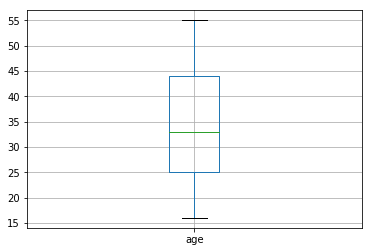

In [443]:
#Method 1 : we replace the outliers with nan values and later replace them with mean value
datamean.loc[(datamean["age"]>90),"age"]=np.nan
datamean.loc[(datamean["age"]<15),"age"]=np.nan
datamean["age"]=datamean["age"].fillna(meanage)

#Method 2 : here we can also deal by droping null values here
#var=var.dropna(subset=["age"])

#for cleaned boxplot of data the values are in range
datamean.boxplot("age")

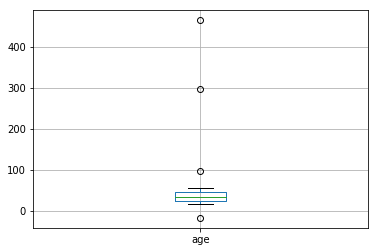

In [444]:
#here we can see the difference after removing outliers
var.boxplot("age")

55.0
16.0


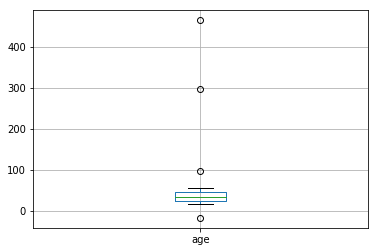

In [445]:
#Method 3 : Remove outliers by replacing with boundary values
#first find boundary value
databound=var.copy()
box=databound.boxplot("age", return_type='dict')
maxboundary=box["whiskers"][1].get_ydata()[1]
minboundary=box["whiskers"][0].get_ydata()[1]
print(maxboundary)
print(minboundary)
databound.loc[(var["age"]>90),"age"]=maxboundary
databound.loc[(var["age"]<15),"age"]=minboundary
#print(databound)


AxesSubplot(0.125,0.125;0.775x0.755)


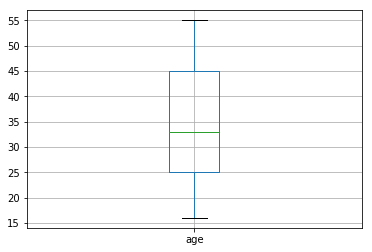

In [446]:
print(databound.boxplot("age"))

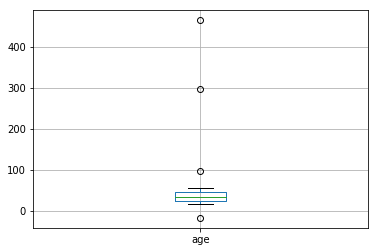

In [447]:
#here we can see the difference after removing outliers
var.boxplot("age")

In [448]:
#the min,max,mean,etc values changes as outliers have been replaced
var=datamean.copy()
var.describe()

,trt,age,educ,black,hisp,marr,nodeg,re74,re75,re78
count,97.000,97.000,97.000,97.000,97.000,97.000,97.000,97.000,97.000,97.000
mean,0.000,34.254,12.021,0.052,0.072,0.691,0.371,16224.769,15681.861,16114.974
std,0.000,11.011,2.549,0.222,0.260,0.465,0.486,8971.914,8737.012,8747.525
min,0.000,16.000,4.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,25.000,10.000,0.000,0.000,0.000,0.000,8638.407,9755.468,9043.687
50%,0.000,33.000,12.000,0.000,0.000,1.000,0.000,18534.660,16735.940,18059.300
75%,0.000,44.000,13.000,0.000,0.000,1.000,1.000,24994.370,24967.840,25564.670
max,0.000,55.000,18.000,1.000,1.000,1.000,1.000,25862.320,25243.550,25564.670


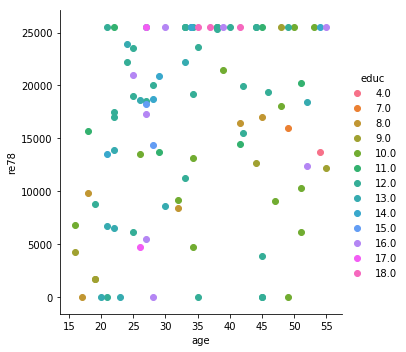

In [449]:
#Age, Salary plotting with education
sns.FacetGrid(var, hue="educ", height=5) \
   .map(plt.scatter, "age", "re78") \
   .add_legend()

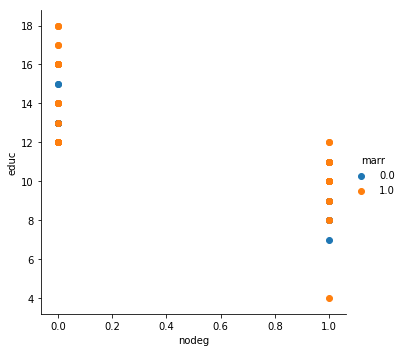

In [450]:
sns.FacetGrid(var, hue="marr", height=5) \
   .map(plt.scatter, "nodeg", "educ") \
   .add_legend()

In [451]:
#unnormalized data
normalminmax=var.copy()

In [452]:
#for normalising data using mix max technique
#convert to numpy array
x = normalminmax.values 

In [453]:
print(x)

[[0.00000000e+00 4.50000000e+01 1.10000000e+01 0.00000000e+00
  0.00000000e+00 1.00000000e+00 1.00000000e+00 2.15166700e+04
  2.52435500e+04 2.55646700e+04]
 [0.00000000e+00 2.10000000e+01 1.40000000e+01 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 3.17597100e+03
  5.85256500e+03 1.34960800e+04]
 [0.00000000e+00 3.80000000e+01 1.20000000e+01 0.00000000e+00
  0.00000000e+00 1.00000000e+00 0.00000000e+00 2.30390200e+04
  2.51307600e+04 2.55646700e+04]
 [0.00000000e+00 3.42538521e+01 1.20000000e+01 0.00000000e+00
  0.00000000e+00 1.00000000e+00 1.00000000e+00 2.49943700e+04
  2.52435500e+04 2.55646700e+04]
 [0.00000000e+00 1.80000000e+01 8.00000000e+00 0.00000000e+00
  0.00000000e+00 1.00000000e+00 1.00000000e+00 1.66929500e+03
  1.07276100e+04 9.86086900e+03]
 [0.00000000e+00 2.20000000e+01 1.10000000e+01 0.00000000e+00
  0.00000000e+00 1.00000000e+00 1.00000000e+00 1.63657600e+04
  1.84492700e+04 2.55646700e+04]
 [0.00000000e+00 4.80000000e+01 1.00000000e+01 0.00000000e

In [454]:
#use preprocessing to transform the data into normalized form
min_max_scaler = pp.MinMaxScaler()

In [455]:
x_scaled = min_max_scaler.fit_transform(x)

In [456]:
#convert normalized data back to dataframe
normalminmax = pd.DataFrame(x_scaled)

In [457]:
print(normalminmax)

       0     1     2     3     4     5     6     7     8     9
0  0.000 0.744 0.500 0.000 0.000 1.000 1.000 0.832 1.000 1.000
1  0.000 0.128 0.714 0.000 0.000 0.000 0.000 0.123 0.232 0.528
2  0.000 0.564 0.571 0.000 0.000 1.000 0.000 0.891 0.996 1.000
3  0.000 0.468 0.571 0.000 0.000 1.000 1.000 0.966 1.000 1.000
4  0.000 0.051 0.286 0.000 0.000 1.000 1.000 0.065 0.425 0.386
5  0.000 0.154 0.500 0.000 0.000 1.000 1.000 0.633 0.731 1.000
6  0.000 0.821 0.429 0.000 0.000 1.000 1.000 0.650 0.648 0.706
7  0.000 0.051 0.500 0.000 0.000 0.000 1.000 0.044 0.143 0.616
8  0.000 0.821 0.357 0.000 0.000 1.000 1.000 1.000 1.000 1.000
9  0.000 0.744 0.571 0.000 0.000 1.000 0.000 1.000 0.000 0.154
10 0.000 0.462 0.714 0.000 0.000 1.000 0.000 1.000 0.941 1.000
11 0.000 0.000 0.429 0.000 0.000 0.000 1.000 0.040 0.049 0.268
12 0.000 0.949 0.429 0.000 0.000 1.000 1.000 1.000 1.000 1.000
13 0.000 0.077 0.571 0.000 0.000 0.000 0.000 0.034 0.174 0.343
14 0.000 0.468 0.571 0.000 0.000 1.000 0.000 1.000 0.75

In [462]:
# we can see the difference in normalized data
print(var)

    trt    age   educ  black  hisp  marr  nodeg      re74      re75      re78
0     0 45.000 11.000  0.000     0 1.000      1 21516.670 25243.550 25564.670
1     0 21.000 14.000  0.000     0 0.000      0  3175.971  5852.565 13496.080
2     0 38.000 12.000  0.000     0 1.000      0 23039.020 25130.760 25564.670
3     0 34.254 12.000  0.000     0 1.000      1 24994.370 25243.550 25564.670
4     0 18.000  8.000  0.000     0 1.000      1  1669.295 10727.610  9860.869
5     0 22.000 11.000  0.000     0 1.000      1 16365.760 18449.270 25564.670
6     0 48.000 10.000  0.000     0 1.000      1 16804.630 16354.600 18059.300
7     0 18.000 11.000  0.000     0 0.000      1  1144.212  3620.032 15739.270
8     0 48.000  9.000  0.000     0 1.000      1 25862.320 25243.550 25564.670
9     0 45.000 12.000  0.000     0 1.000      0 25862.320     0.000  3924.842
10    0 34.000 14.000  0.000     0 1.000      0 25862.320 23746.840 25564.670
11    0 16.000 10.000  0.000     0 0.000      1  1026.656  1224.

In [459]:
zscorenormal=var.copy()

In [463]:
zscorenormal=zscorenormal.apply(zscore)
print(zscorenormal)

    trt    age   educ  black   hisp   marr  nodeg   re74   re75   re78
0   nan  0.981 -0.402 -0.233 -0.279  0.669  1.302  0.593  1.100  1.086
1   nan -1.210  0.780 -0.233 -0.279 -1.494 -0.768 -1.462 -1.131 -0.301
2   nan  0.342 -0.008 -0.233 -0.279  0.669 -0.768  0.763  1.087  1.086
3   nan -0.000 -0.008 -0.233 -0.279  0.669  1.302  0.983  1.100  1.086
4   nan -1.484 -1.585 -0.233 -0.279  0.669  1.302 -1.631 -0.570 -0.719
5   nan -1.119 -0.402 -0.233 -0.279  0.669  1.302  0.016  0.318  1.086
6   nan  1.255 -0.797 -0.233 -0.279  0.669  1.302  0.065  0.077  0.223
7   nan -1.484 -0.402 -0.233 -0.279 -1.494  1.302 -1.690 -1.388 -0.043
8   nan  1.255 -1.191 -0.233 -0.279  0.669  1.302  1.080  1.100  1.086
9   nan  0.981 -0.008 -0.233 -0.279  0.669 -0.768  1.080 -1.804 -1.401
10  nan -0.023  0.780 -0.233 -0.279  0.669 -0.768  1.080  0.928  1.086
11  nan -1.666 -0.797 -0.233 -0.279 -1.494  1.302 -1.703 -1.663 -1.065
12  nan  1.711 -0.797 -0.233 -0.279  0.669  1.302  1.080  1.100  1.086
13  na

In [464]:
# we can see the difference in normalized data
print(var)

    trt    age   educ  black  hisp  marr  nodeg      re74      re75      re78
0     0 45.000 11.000  0.000     0 1.000      1 21516.670 25243.550 25564.670
1     0 21.000 14.000  0.000     0 0.000      0  3175.971  5852.565 13496.080
2     0 38.000 12.000  0.000     0 1.000      0 23039.020 25130.760 25564.670
3     0 34.254 12.000  0.000     0 1.000      1 24994.370 25243.550 25564.670
4     0 18.000  8.000  0.000     0 1.000      1  1669.295 10727.610  9860.869
5     0 22.000 11.000  0.000     0 1.000      1 16365.760 18449.270 25564.670
6     0 48.000 10.000  0.000     0 1.000      1 16804.630 16354.600 18059.300
7     0 18.000 11.000  0.000     0 0.000      1  1144.212  3620.032 15739.270
8     0 48.000  9.000  0.000     0 1.000      1 25862.320 25243.550 25564.670
9     0 45.000 12.000  0.000     0 1.000      0 25862.320     0.000  3924.842
10    0 34.000 14.000  0.000     0 1.000      0 25862.320 23746.840 25564.670
11    0 16.000 10.000  0.000     0 0.000      1  1026.656  1224.

In [465]:
#Dimensionality reduction - correlation 
#first copy the data
var=normalminmax.copy()
cor=var.copy()
print(cor)

       0     1     2     3     4     5     6     7     8     9
0  0.000 0.744 0.500 0.000 0.000 1.000 1.000 0.832 1.000 1.000
1  0.000 0.128 0.714 0.000 0.000 0.000 0.000 0.123 0.232 0.528
2  0.000 0.564 0.571 0.000 0.000 1.000 0.000 0.891 0.996 1.000
3  0.000 0.468 0.571 0.000 0.000 1.000 1.000 0.966 1.000 1.000
4  0.000 0.051 0.286 0.000 0.000 1.000 1.000 0.065 0.425 0.386
5  0.000 0.154 0.500 0.000 0.000 1.000 1.000 0.633 0.731 1.000
6  0.000 0.821 0.429 0.000 0.000 1.000 1.000 0.650 0.648 0.706
7  0.000 0.051 0.500 0.000 0.000 0.000 1.000 0.044 0.143 0.616
8  0.000 0.821 0.357 0.000 0.000 1.000 1.000 1.000 1.000 1.000
9  0.000 0.744 0.571 0.000 0.000 1.000 0.000 1.000 0.000 0.154
10 0.000 0.462 0.714 0.000 0.000 1.000 0.000 1.000 0.941 1.000
11 0.000 0.000 0.429 0.000 0.000 0.000 1.000 0.040 0.049 0.268
12 0.000 0.949 0.429 0.000 0.000 1.000 1.000 1.000 1.000 1.000
13 0.000 0.077 0.571 0.000 0.000 0.000 0.000 0.034 0.174 0.343
14 0.000 0.468 0.571 0.000 0.000 1.000 0.000 1.000 0.75

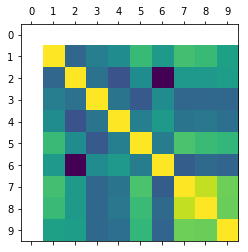

In [466]:
#finding correlation for dimensionality reduction
corrl=var.copy()
corrl = corrl.corr()
fig, ax = plt.subplots()
ax.matshow(corrl)
plt.xticks(range(len(corrl.columns)), corrl.columns);
plt.yticks(range(len(corrl.columns)), corrl.columns);

In [467]:
#As we can see 0th index has no contribution in correlation we can remove that
cleandata=var.copy()
cleandata.drop(cleandata.columns[0],axis=1,inplace=True)
print(cleandata)

       1     2     3     4     5     6     7     8     9
0  0.744 0.500 0.000 0.000 1.000 1.000 0.832 1.000 1.000
1  0.128 0.714 0.000 0.000 0.000 0.000 0.123 0.232 0.528
2  0.564 0.571 0.000 0.000 1.000 0.000 0.891 0.996 1.000
3  0.468 0.571 0.000 0.000 1.000 1.000 0.966 1.000 1.000
4  0.051 0.286 0.000 0.000 1.000 1.000 0.065 0.425 0.386
5  0.154 0.500 0.000 0.000 1.000 1.000 0.633 0.731 1.000
6  0.821 0.429 0.000 0.000 1.000 1.000 0.650 0.648 0.706
7  0.051 0.500 0.000 0.000 0.000 1.000 0.044 0.143 0.616
8  0.821 0.357 0.000 0.000 1.000 1.000 1.000 1.000 1.000
9  0.744 0.571 0.000 0.000 1.000 0.000 1.000 0.000 0.154
10 0.462 0.714 0.000 0.000 1.000 0.000 1.000 0.941 1.000
11 0.000 0.429 0.000 0.000 0.000 1.000 0.040 0.049 0.268
12 0.949 0.429 0.000 0.000 1.000 1.000 1.000 1.000 1.000
13 0.077 0.571 0.000 0.000 0.000 0.000 0.034 0.174 0.343
14 0.468 0.571 0.000 0.000 1.000 0.000 1.000 0.755 0.752
15 0.410 0.429 0.000 0.000 1.000 1.000 0.790 0.926 0.359
16 0.282 0.571 0.000 0.000 1.00